### Basketball Academy Data Report [Analysis and Inisights] ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx 
import fiona

Lets load the cleaned csv file

In [2]:
df = pd.read_csv('data/merged_df.csv')

In [3]:
df.head()

,Timestamp,Student ID,Aug 19,Aug 20,Aug 21,Aug 22,Aug 23,Payment Received,Jersey Sizes,Payment Date,...,Age,Gender,School,Payment Instruction Acknowledgement,Injury Liability Waver,Photograph Release Agreement,Returning Customer,Elite Team Status,Weekend Academy Status,School Geographic Region
0,2024-08-19 18:00:00,AA-200805-1,True,True,True,True,True,0,40,2024-08-24,...,16,Male,Dsc International School,False,False,False,True,True,False,Islands District
1,2024-08-19 18:00:00,AA-200910-1,True,True,True,True,True,0,40,2024-08-24,...,14,Male,Dsc International School,False,False,False,True,True,False,Islands District
2,2024-07-31 06:49:26,AJ-201306-1,True,True,True,True,True,2000,32,2024-08-01,...,11,Male,Silvermine Bay School,True,True,True,True,True,False,Islands District
3,2024-07-30 06:38:05,AL-201410-1,True,True,True,True,True,2000,34,2024-07-30,...,9,Male,Hong Kong International School,True,True,False,True,False,False,Southern District
4,2024-08-18 13:52:32,BH-201109-1,True,True,False,False,True,2000,38,2024-08-24,...,12,Male,ESF South Island School,True,True,True,True,True,False,Southern District


**Goals for Analysis**
* Demographic Visualization and Counts
    - Age
    - Gender
    - Schools
    - ESF vs Non-ESF Schools
* Customer Turnout Rate
    - Compare old spreadsheet with new cleaned spreadsheet. old sheet student count/cleaned sheet count.
    - Create new series table with just the student ID's including those who didnt attend
* Attendance 
    - Counts for when students sign up for the camp
    - Check if payments match the attendance ($400/Session)
* Use timestamp data to plot when people are paying
    - Create either time series line plot or a histogram
* Finding Patterns and Correlations
    - Create seaborn heatmap correlation matrix
    - For areas with high correlation investigate why using industry knowledge and create an actionable solution
* Hong Kong District Heatmap
*   - Create a geographical heatmap using geopandas to visualize which areas our kids go to school

**Age Demographic Visualization**

Text(0.5, 1.0, 'Age Distribution')

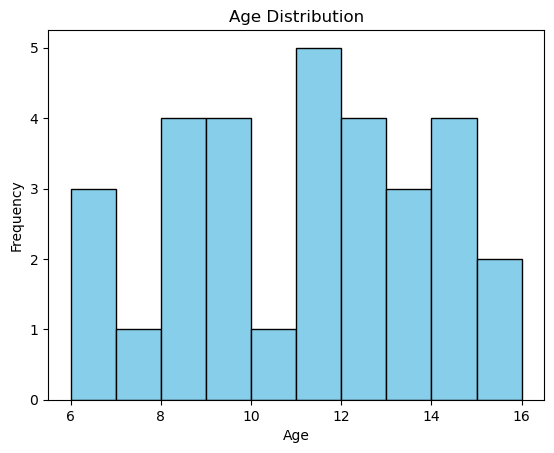

In [4]:
unique_ages = df['Age'].unique()
plt.hist(df['Age'], bins=(len(unique_ages)), color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

**Gender Distribution**

Text(0.5, 1.0, 'Gender Distribution')

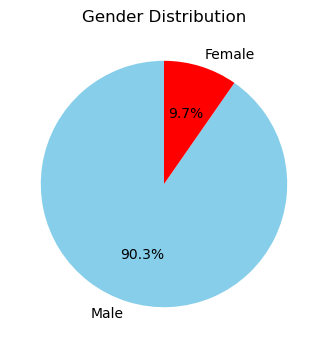

In [5]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))
# Plotting the pie chart using matplotlib
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
plt.title('Gender Distribution')

**School Distribution**


C:\Users\Kai\AppData\Local\Temp\ipykernel_37128\3161214886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='School', data=df, palette='viridis')


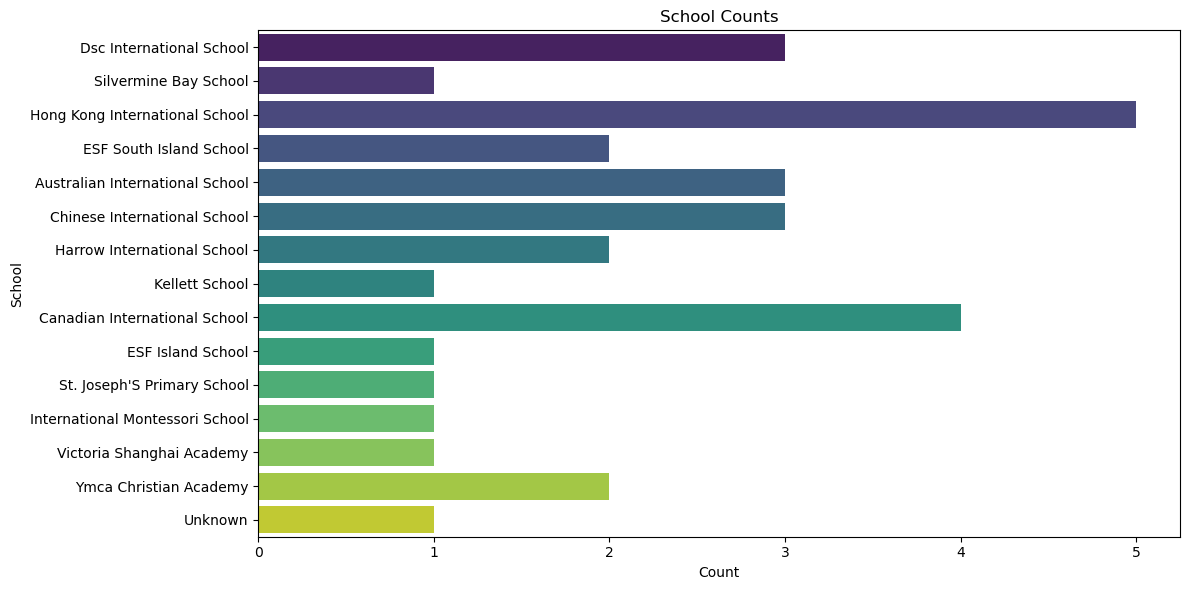

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(y='School', data=df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('School')
plt.title('School Counts')
plt.tight_layout()
plt.show()

ESF vs Non-ESF School Counts

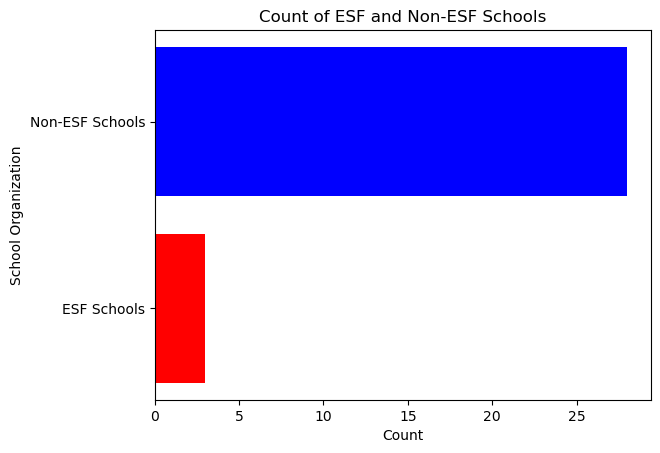

In [7]:
esf_count = df['School'].str.upper().str.count('ESF').sum()
non_esf_count = sum(df['School'].apply(lambda x: 'ESF' not in x.upper()))
plt.barh(['ESF Schools', 'Non-ESF Schools'], [esf_count, non_esf_count], color=['red', 'blue'])
plt.xlabel('Count')
plt.ylabel('School Organization')
plt.title('Count of ESF and Non-ESF Schools')
plt.show()

**Customer Turnout Rate**

In [8]:
old_df = pd.read_csv('data/Anonymized_Data.csv')
new_df = pd.read_csv ('data/Cleaned_Data.csv')

dropped_out = len(old_df['Student ID']) - len(new_df['Student ID'])
cust_churn = (dropped_out / len(old_df['Student ID']) * 100)
print(f'Customer Churn for the Camp was {cust_churn:.3g}%')

Customer Churn for the Camp was 8.82%


**Attendance over the camp duration**

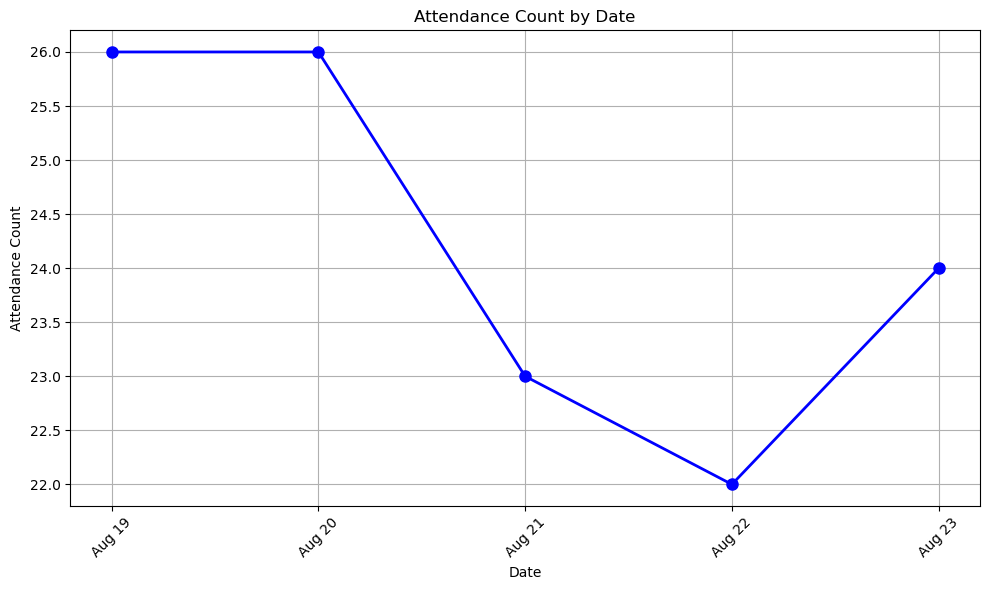

In [9]:
attendance_columns = df.columns[2:7]

# Calculate total attendance count for each date
attendance_counts = df[attendance_columns].sum()

# Plot the attendance counts on a line graph
plt.figure(figsize=(10, 6))
plt.plot(attendance_counts.index, attendance_counts.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Attendance Count')
plt.title('Attendance Count by Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Form Timestamp Visualization**

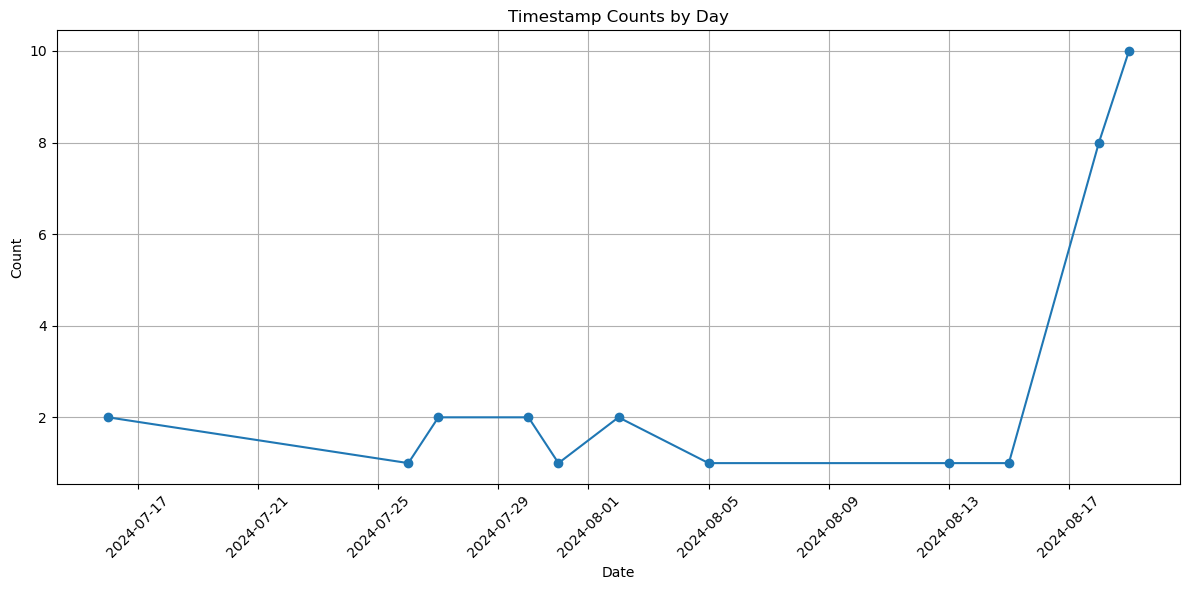

In [10]:
# Extract just the date part from the timestamps
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
dates = df['Timestamp'].dt.date

# Count the occurrences of each date
date_counts = dates.value_counts().sort_index()

# Plotting the counts of timestamps per day
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Timestamp Counts by Day')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

**Finding Patterns and Correlations using a Correlation Matrix**

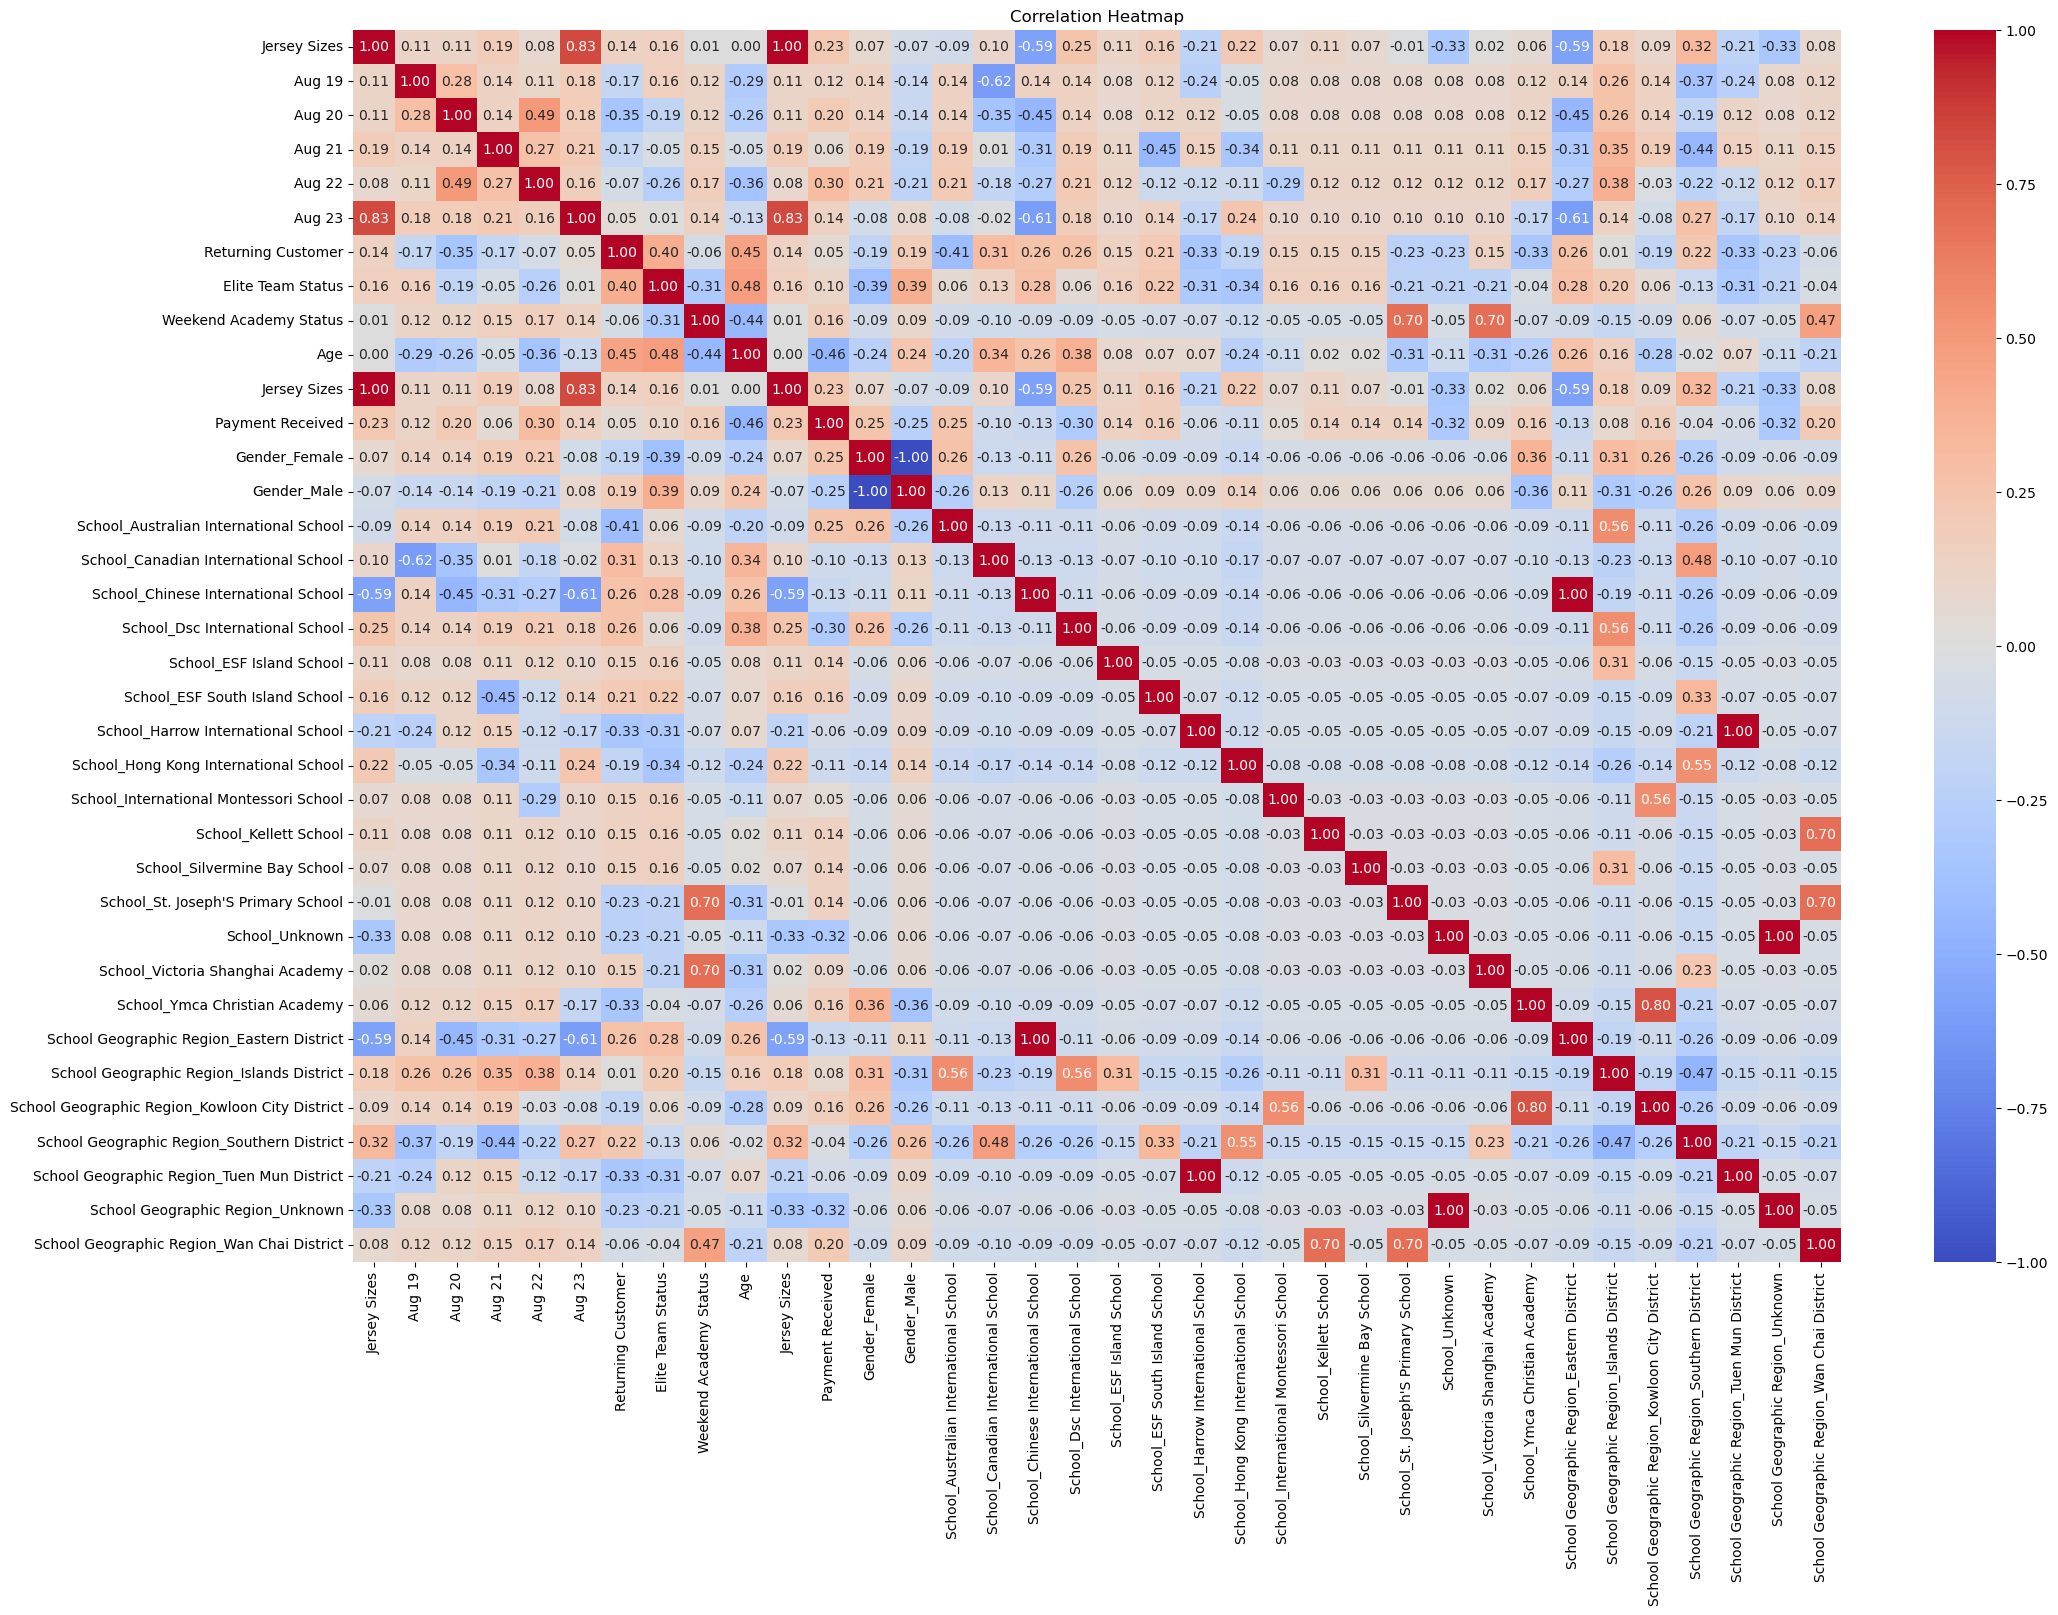

In [11]:
df = pd.read_csv('data/merged_df.csv')

selected_columns = ['Gender', 'School', 'Jersey Sizes', 'School Geographic Region', 'Aug 19', 'Aug 20', 'Aug 21', 'Aug 22', 'Aug 23', 'Returning Customer', 'Elite Team Status', 'Weekend Academy Status', 'Age', 'Jersey Sizes', 'Payment Received']

# Filter the DataFrame to include only the selected columns
df_filtered = df[selected_columns]

# Perform one-hot encoding for categorical columns
categorical_columns = ['Gender', 'School', 'School Geographic Region']
df_encoded = pd.get_dummies(df_filtered, columns=categorical_columns)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Weekend Academy Conversion Rate based on eligibility (Ages 6-12)**

In [12]:
# Total Conversion Rate
total_weekend_students = df['Weekend Academy Status'].sum()
total_students = len(df['Weekend Academy Status'])
# Conversion Rate for those Eligible for our weekend Academy (Ages 6-12)
filtered_df_weekend = df[(df['Age'] >= 6) & (df['Age'] <= 12)]
len_ages = len(filtered_df_weekend)
conversion_rate = (total_weekend_students / len_ages ) * 100
print(f'Weekend Academy Conversion Rate: {conversion_rate:.2f}%')

Weekend Academy Conversion Rate: 9.09%


**Elite Team Conversion Rate Based on Eligibility (Ages 10-18)**

In [13]:
# Total Conversion Rate
total_elite_students = df['Elite Team Status'].sum()
# Conversion Rate for those Eligible for our weekend Academy (Ages 6-12)
filtered_df = df[(df['Age'] >= 10) & (df['Age'] <= 18)]
len_ages = len(filtered_df)
conversion_rate = (total_elite_students / len_ages ) * 100
print(f'Elite Team Conversion Rate: {conversion_rate:.2f}%')

Elite Team Conversion Rate: 94.74%


**Returning Customer Rate**

In [14]:
total_returning_customers = df['Returning Customer'].sum()
cust_return_rate = (total_returning_customers / total_students ) * 100
print(f'Returning Customer Conversion Rate: {cust_return_rate:.2f}%')   

Returning Customer Conversion Rate: 61.29%


**HK District Heatmap**


I noticed district names in my csv file and shape file do not match, lets create a dictionary and map the current names to the shape file names.

In [15]:
# Check Shapefile districts
hk_districts = gpd.read_file('data/HK_District/HKDistrict18.shp')
unique_shapefile_districts = hk_districts['ENAME'].unique()
print("\nUnique District Names in Shapefile:")
print(unique_shapefile_districts)

# Check CSV Districts 
unique_school_districts = df['School Geographic Region'].unique()
print("Unique District Names in School Data:")
print(unique_school_districts)


Unique District Names in Shapefile:
['WONG TAI SIN' 'KOWLOON CITY' 'KWUN TONG' 'SAI KUNG' 'NORTH'
 'CENTRAL & WESTERN' 'WAN CHAI' 'EASTERN' 'TUEN MUN' 'YUEN LONG'
 'SOUTHERN' 'ISLANDS' 'SHAM SHUI PO' 'YAU TSIM MONG' 'KWAI TSING'
 'TSUEN WAN' 'TAI PO' 'SHA TIN']
Unique District Names in School Data:
['Islands District' 'Southern District' 'Eastern District'
 'Tuen Mun District' 'Wan Chai District' 'Kowloon City District' 'Unknown']


Lets change the names into the correct names found in the Shapefile

In [16]:
district_map_dict = {
    "Islands District" : "ISLANDS",
    "Southern District" : "SOUTHERN",
    "Eastern District" : "EASTERN",
    "Kowloon City District" : "KOWLOON CITY",
    "Tuen Mun District": "TUEN MUN",
    "Wan Chai District": "WANCHAI",
    "Unknown": "UNKNOWN"
}

df['School Geographic Region'] = df['School Geographic Region'].map(district_map_dict)
unique_school_districts = df['School Geographic Region'].unique()
print(unique_school_districts)


['ISLANDS' 'SOUTHERN' 'EASTERN' 'TUEN MUN' 'WANCHAI' 'KOWLOON CITY'
 'UNKNOWN']


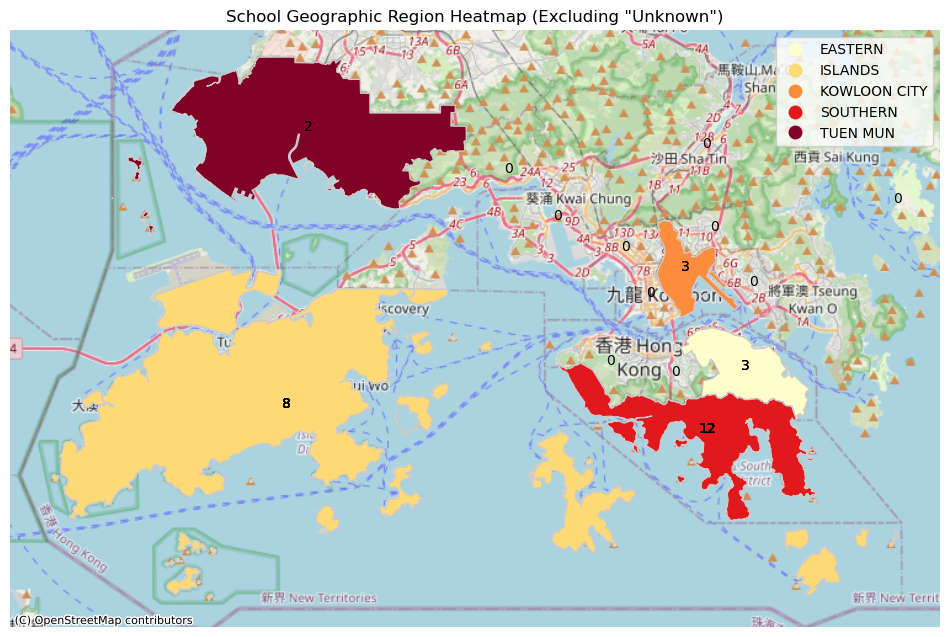

In [17]:
# Calculate the value counts of each district in the 'School Geographic Region' column
district_counts = df['School Geographic Region'].value_counts()

# Merge the datasets
merged = hk_districts.merge(df, how='left', left_on='ENAME', right_on='School Geographic Region')

# Filter out "Unknown" values
merged_filtered = merged[merged['School Geographic Region'] != 'Unknown']

# Adjust the colormap for better visibility and differentiation
fig, ax = plt.subplots(figsize=(12, 12))

# Choose a colormap that emphasizes differences
merged_filtered.plot(column='School Geographic Region', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

# Add annotations for district counts
for idx, row in merged_filtered.iterrows():
    district_name = row['School Geographic Region']
    count = district_counts.get(district_name, 0)
    plt.annotate(text=f'{count}', xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black', fontsize=10, ha='center')

# Add a basemap using OpenStreetMap
ctx.add_basemap(ax, crs=merged_filtered.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('School Geographic Region Heatmap (Excluding "Unknown")')
plt.axis('off')
plt.show()